In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.remove('not')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:997)>


False

In [5]:
 df=pd.read_csv('panipat.csv')

In [6]:
df=df[df['content'].str.len()>200]

In [7]:
df

,Unnamed: 0,date,content
3,3,2022-10-30 16:09:28+00:00,"@Hardism Also he is extremely lazy, his body l..."
6,6,2022-10-30 12:47:26+00:00,@StarSportsIndia On a tough day for the Indian...
10,10,2022-10-30 02:35:27+00:00,@IMAIndiaOrg\n\nFirst Time I saw Live Heart At...
12,12,2022-10-29 11:56:54+00:00,#GodMorningSaturda\nSupreme God Kabir\nAlways ...
13,13,2022-10-29 10:44:46+00:00,It's a direct attack on the interests of stude...
...,...,...,...
343,343,2018-01-17 13:44:22+00:00,On the bowling front Indian pace attack has la...
349,349,2018-01-06 11:56:19+00:00,@bhogleharsha India should do the counter atta...
350,350,2018-01-06 11:43:55+00:00,Indian team will have to bat like Sehwag if th...
353,353,2017-12-17 13:38:40+00:00,Pakistan Church Attacked by 2 Suicide Bombers ...


In [8]:
 df=df.drop('Unnamed: 0',axis=1)

In [9]:
def preprocess_text(text):
    text=text.lower()
    #remove urls
    text=re.sub(r"http\S+|www\S+|https\S+", "",text,flags=re.MULTILINE)
    text=text.translate(str.maketrans("", "",string.punctuation))
    text=re.sub(r'\@\w+|\#', "",text)
    text_tokens=word_tokenize(text)
    fil_words=[word for word in text_tokens if word not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stem_words=[ps.stem(w) for w in fil_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lem_words=[lemmatizer.lemmatize(w, pos='a') for w in stem_words]
    
    return " ".join(lem_words)

In [36]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
df['clean']=df['content'].apply(preprocess_text);

In [11]:
from textblob import TextBlob
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet['TextBlob_Subjectivity'] = tweet['clean'].apply(getSubjectivity)
 tweet['TextBlob_Polarity'] = tweet['clean'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet ['TextBlob_Analysis'] = tweet  ['TextBlob_Polarity'].apply(getAnalysis )
 return tweet

dfnew=sentiment_analysis(df)

In [12]:
dfnew

,date,content,clean,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
3,2022-10-30 16:09:28+00:00,"@Hardism Also he is extremely lazy, his body l...",hardism also extrem lazi bodi languag neg does...,0.362500,0.337500,Positive
6,2022-10-30 12:47:26+00:00,@StarSportsIndia On a tough day for the Indian...,starsportsindia tough day indian batter suryak...,0.566667,0.305556,Positive
10,2022-10-30 02:35:27+00:00,@IMAIndiaOrg\n\nFirst Time I saw Live Heart At...,imaindiaorg first time saw live heart attack f...,0.546667,0.177273,Positive
12,2022-10-29 11:56:54+00:00,#GodMorningSaturda\nSupreme God Kabir\nAlways ...,godmorningsaturda suprem god kabir alway chant...,0.000000,0.000000,Neutral
13,2022-10-29 10:44:46+00:00,It's a direct attack on the interests of stude...,direct attack interest student dream becom doc...,0.583333,-0.100000,Negative
...,...,...,...,...,...,...
343,2018-01-17 13:44:22+00:00,On the bowling front Indian pace attack has la...,bowl front indian pace attack lack bounc need ...,0.000000,0.000000,Neutral
349,2018-01-06 11:56:19+00:00,@bhogleharsha India should do the counter atta...,bhogleharsha india counter attack like dhawan ...,0.533333,0.566667,Positive
350,2018-01-06 11:43:55+00:00,Indian team will have to bat like Sehwag if th...,indian team bat like sehwag want beat south af...,0.150000,0.650000,Positive
353,2017-12-17 13:38:40+00:00,Pakistan Church Attacked by 2 Suicide Bombers ...,pakistan church attack 2 suicid bomber islam s...,0.000000,0.000000,Neutral


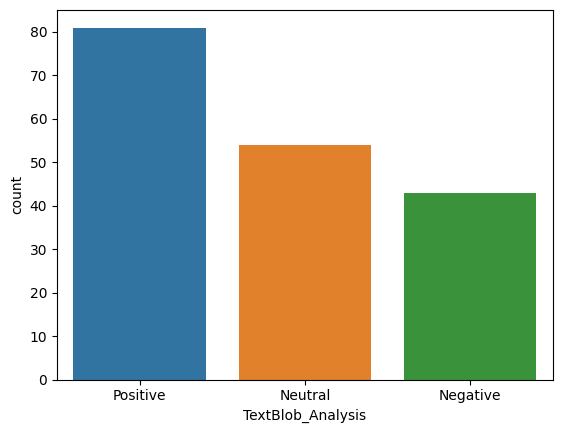

In [13]:
sns.countplot(x=dfnew.TextBlob_Analysis)
plt.show()

In [14]:
def get_n_grams(text,low_n,high_n,top_number):
    
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

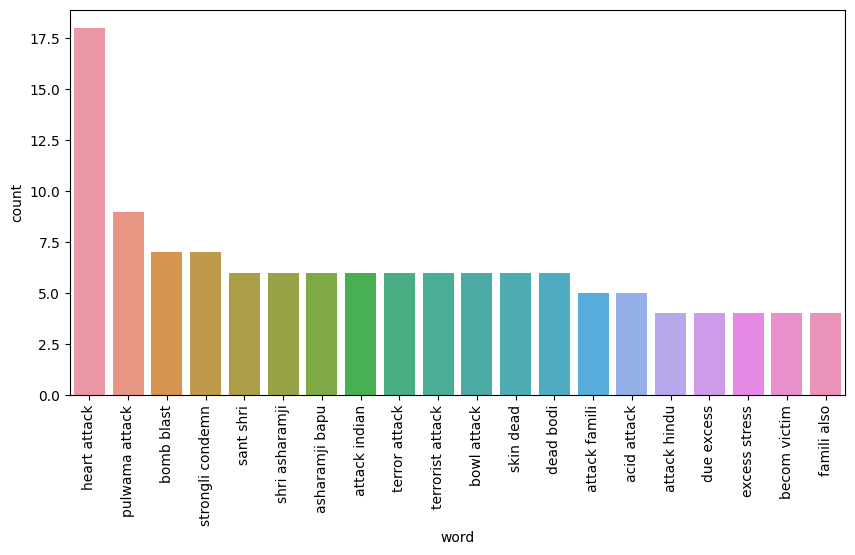

,word,count
0,heart attack,18
1,pulwama attack,9
2,bomb blast,7
3,strongli condemn,7
4,sant shri,6
5,shri asharamji,6
6,asharamji bapu,6
7,attack indian,6
8,terror attack,6
9,terrorist attack,6


In [15]:
get_n_grams(df.clean,2,2,20)